# K-Nearest-Neighbors
Author: Kim Hazed Delfino

## Imports 

In [32]:
import pandas as pd
import numpy as np
# libraries for plotting visuals
import matplotlib.pyplot as plt
import seaborn as sns
# necessary libs 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
# metrics lib
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

## Load the Data

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
df = pd.read_csv(url, header=None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
# Add column names according to data source
df.columns = ["Sex", "Length", "Diameter","Height",
              "Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]

In [12]:
#double check
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
# Check the target distribution 
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [14]:
df.duplicated().sum()

0

- Target Distribution is relatively balanced
- No missing values or duplicate

## Preprocessing 

In [17]:
# Assign Feature Matrices and Target Vector
X = df.drop(columns="Sex")
y = df["Sex"]
# Train test split
X_train , X_test , y_train , y_test = train_test_split(X,y, random_state=42)

In [19]:
scaler = StandardScaler()

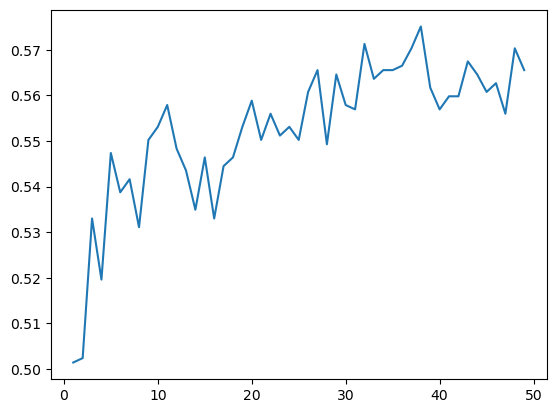

K-param 38 has the best accuracy with 57.51%


In [28]:
k_params  = range(1,50)
accu_tracker = []
best_accu = 0
best_param = 0
for param in k_params:
    k_pipe = make_pipeline(scaler,KNeighborsClassifier(n_neighbors=param))
    k_pipe.fit(X_train, y_train)
    accu = accuracy_score(y_test, k_pipe.predict(X_test))
    # Track the current best accu
    if accu > best_accu:
        best_accu = accu
        best_param = param
    accu_tracker.append(accu)

# Visualize accuracies with k_params
plt.plot(k_params,accu_tracker, label="Accuracy per K-param")
plt.show()

print(f"K-param {best_param} has the best accuracy with {round(best_accu*100,2)}%")

In [29]:
# Finalize KNN model with best param
final_pipe = make_pipeline(scaler, KNeighborsClassifier(n_neighbors= best_param))
final_pipe.fit(X_train , y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=38))])

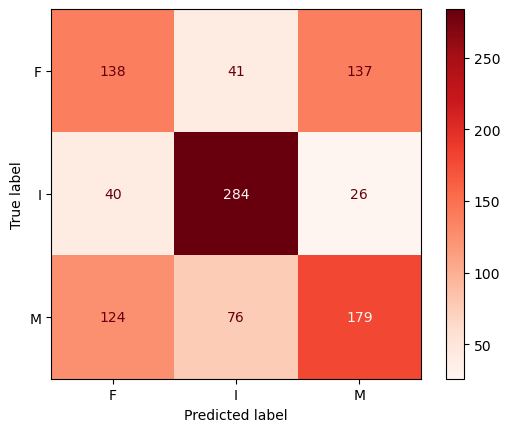

In [34]:
# Visualize using Confusion matrics
ConfusionMatrixDisplay.from_predictions(y_test,final_pipe.predict(X_test), cmap="Reds");

- Here we can see that this model predicts class-I (Infant) the best but struggled on predicting class- F and class -M